<a href="https://colab.research.google.com/github/mgino11/Web_Analytics/blob/main/Spambase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 1
Adam Gersowitz, Diego Correa, Maria A Ginorio

# Spam vs. Ham - UCI Spambase Data Set

It can be useful to be able to classify new "test" documents using already classified "training" documents. A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam.

Here is one example of such data: UCI Machine Learning Repository: Spambase Data Set.

For this project, you can either use the above dataset to predict the class of new documents (either withheld from the training dataset or from another source such as your own spam folder). For more adventurous students, you are welcome (encouraged!) to come up a different set of documents (including scraped web pages!?) that have already been classified (e.g. tagged), then analyze these documents to predict how new documents should be classified.

## Required Packagaes

In [6]:
# data processing packages
import string
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
# sklearn packages
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier

import joblib
import os

## Research Question
Predict spam vs. non-spam emails - Moreover, how can we detect as many true positives (correctly classified spam emails) while limiting false positives (wrongly classified spam emails).

## About the Data
Label = The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

features = Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail.

  * 48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD
  * 6 continuous real [0,100] attributes of type char_freq_CHAR = percentage of characters in the e-mail that match CHAR
  * 1 continuous real [1,...] attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters
  * 1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0),
    i.e. unsolicited commercial e-mail.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mgino11/Web_Analytics/main/Datasets/spambase.csv')

# preview data
df.head(4).T

,0,1,2,3
word_freq_make,0.000,0.210,0.060,0.000
word_freq_address,0.640,0.280,0.000,0.000
word_freq_all,0.640,0.500,0.710,0.000
word_freq_3d,0.000,0.000,0.000,0.000
word_freq_our,0.320,0.140,1.230,0.630
word_freq_over,0.000,0.280,0.190,0.000
word_freq_remove,0.000,0.210,0.190,0.310
word_freq_internet,0.000,0.070,0.120,0.630
word_freq_order,0.000,0.000,0.640,0.310
word_freq_mail,0.000,0.940,0.250,0.630


## EDA

Load the data and split it up into a train and test set of appropriate size. The test set will be used for the final model evaluation, while the training set will be used for the cross-validation.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


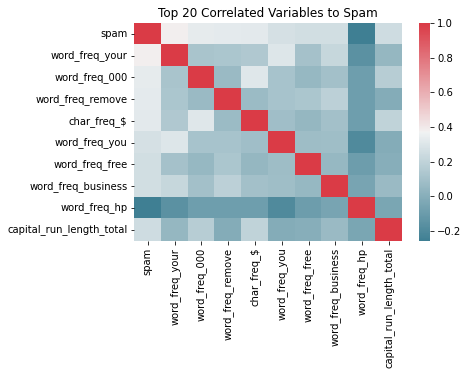

In [7]:
import matplotlib.pyplot  as plt
# Perform correlation matrix on top 10 correlated variables
corr = df.corr()

cols = corr.abs().nlargest(10,'spam')['spam'].index
corr_matrix = np.corrcoef(df[cols].values.T)

ax = sns.heatmap(corr_matrix,
                yticklabels = cols.values,
                xticklabels = cols.values,
                cmap = sns.diverging_palette(220, 10, as_cmap=True)
                )
plt.title('Top 20 Correlated Variables to Spam')
plt.show()

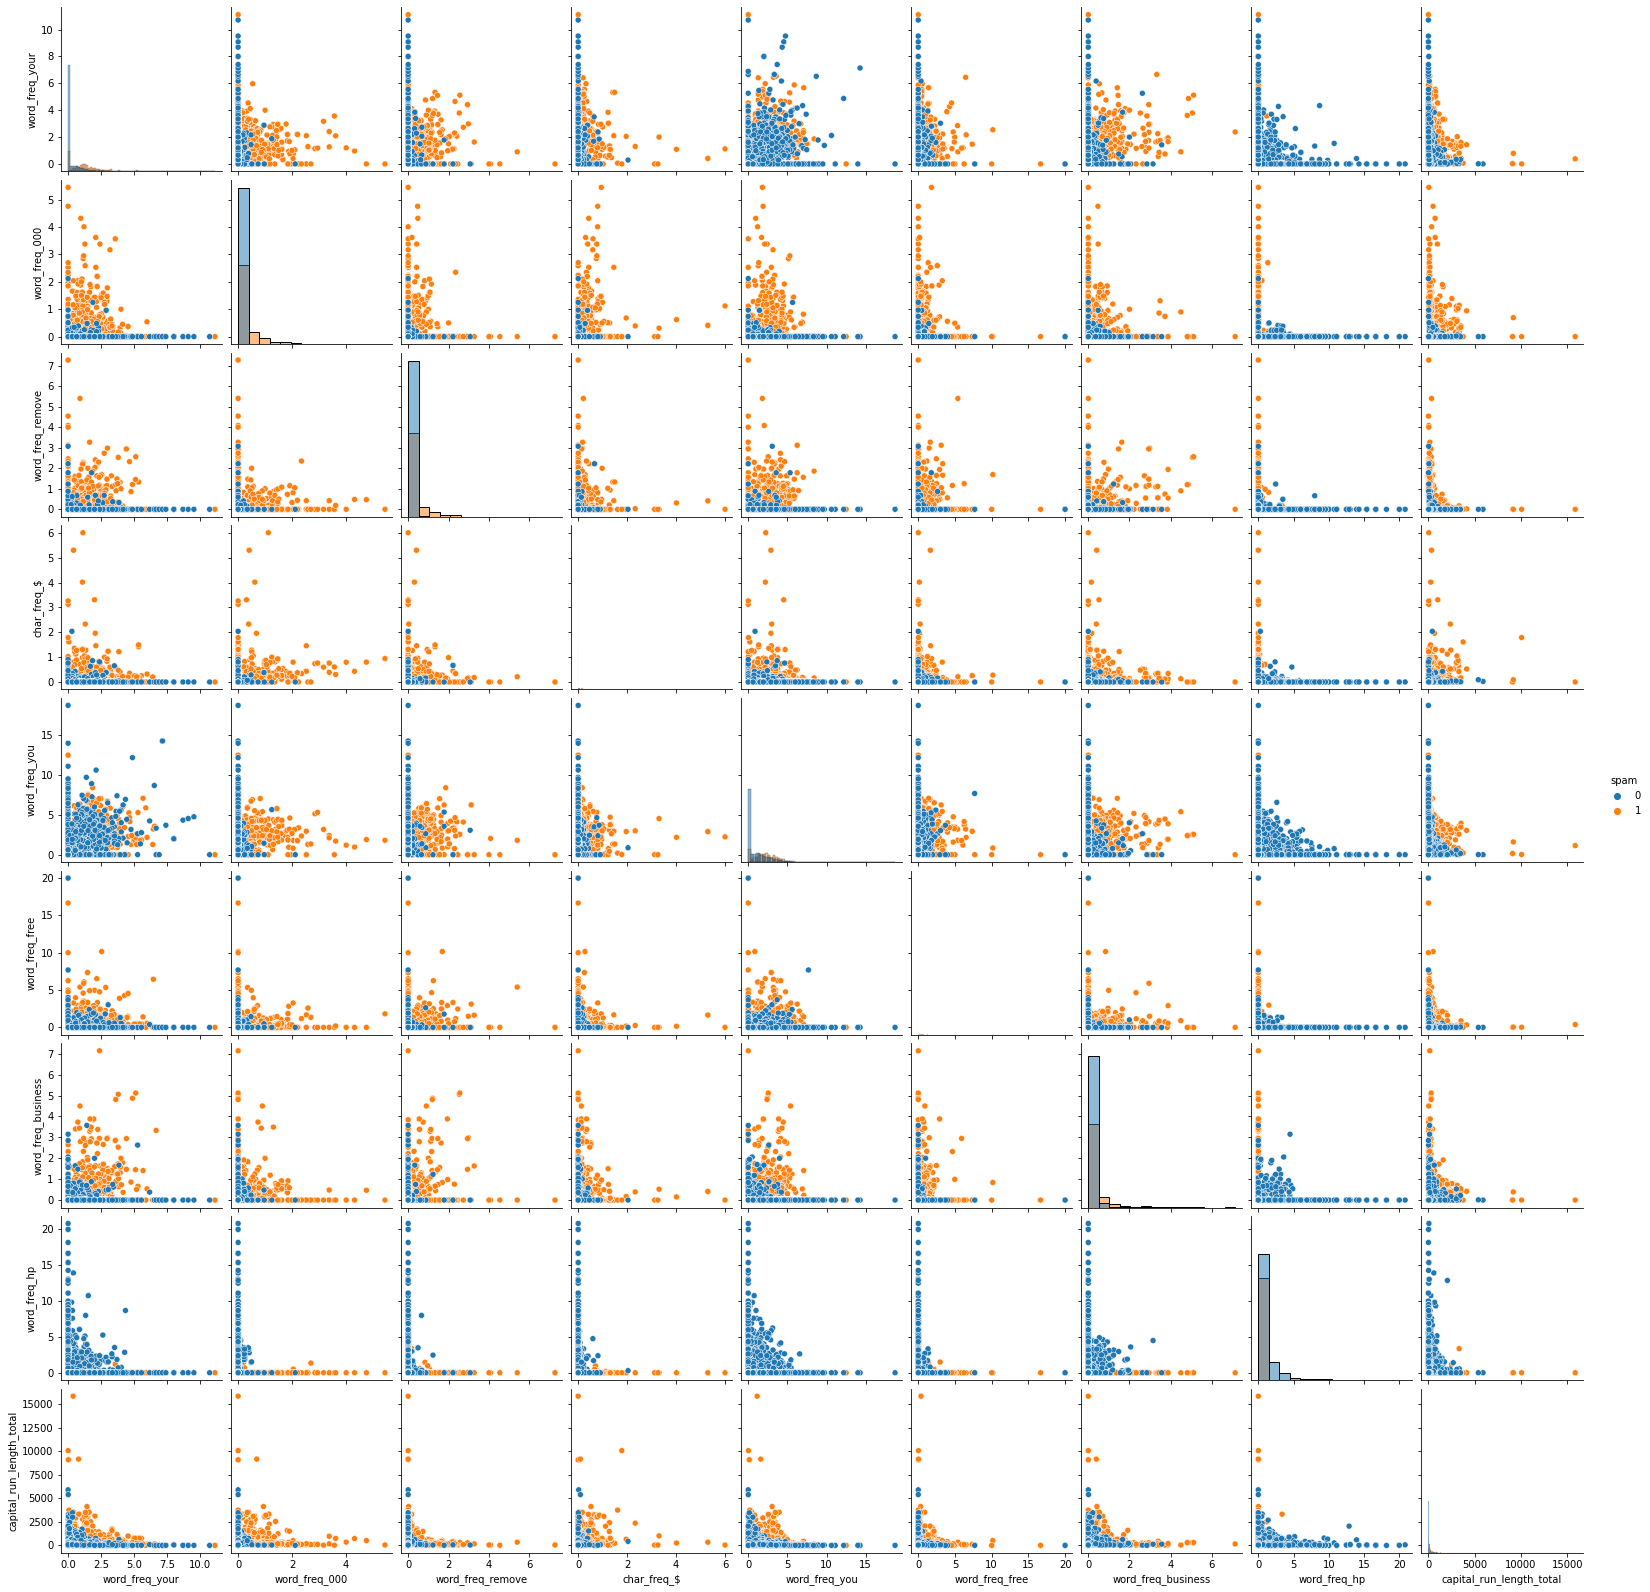

In [8]:
import seaborn as sns
sns.pairplot(df[cols], hue='spam', diag_kind='hist') 

## Models


Searching through algorithms, I found that ExtraTreesClassifier and RandomForestClassifier performed well on this classification task. We will also use Naive Bayes for comparison purposes.


In [10]:

target = df['spam']
data_features = df.drop("spam", axis=1)

# takes a 85/15 train and test split
X_train, X_test, y_train, y_test = train_test_split(
    data_features, target, test_size=0.15, random_state=42)

### SGD Classifier

Now let’s pick a classifier and train it. A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier is capable of handling very large datasets efficiently. 

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.5690184 , 0.48810437, 0.65310821])

Wow! Only 57% accuracy (ratio of correct predictions) on all cross-validation folds. we can do better.

cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.

In [15]:
#from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[ 742, 1659],
       [  22, 1487]])

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

First Row = 

*   NotSpam (0) - 742  (correctly classified) TN

*   NotSpam (0) - 1659 (wrongly classified) FP


Second Row = 


*   Spam (1) - 22 (wrongly classified as NotSpam) -  FN
*   Spam (1) - 1487 (correctly classified as Spam) - TP




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


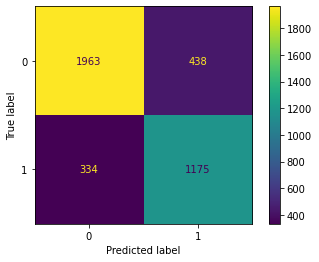

In [17]:
plot_confusion_matrix(sgd_clf, X_train, y_train)
plt.show()

How do you decide which threshold to use? First, use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:

In [18]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [20]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

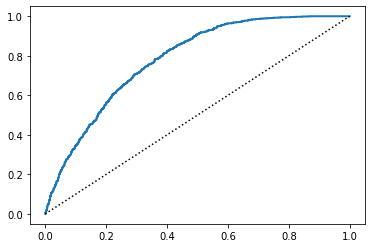

In [21]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.7817251702888319

### Random Forests

In [23]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_predict
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.naive_bayes import GaussianNB

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, 
                                    method="predict_proba")

Let’s look at the class probabilities for the first 5 columns in the training set:

In [24]:
y_probas_forest[:5]

array([[0.98, 0.02],
       [0.  , 1.  ],
       [0.87, 0.13],
       [0.99, 0.01],
       [0.7 , 0.3 ]])

The model predicts that the first column (make) is notSP with 98% probability, and it predicts that the second column (adress) is spam with 100% probability. Since each since each column is either notSpam or Spam, the probabilities in each row add up to 100%.



---



The second column contains the estimated probabilities for the positive class (spam 1), so let’s pass them to the precision_recall_curve() function:

In [25]:
y_probas_forest[:,1]

array([0.02, 1.  , 0.13, ..., 0.02, 0.05, 0.96])

In [26]:
from sklearn.metrics import precision_recall_curve
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train, y_scores_forest)

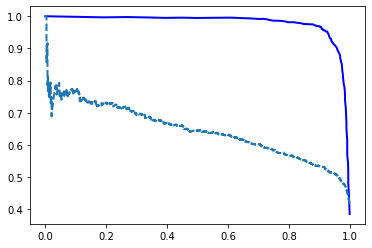

In [27]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.show()

RandomForestClassifier’s PR curve looks much better than the SGDClassifier’s: it comes much closer to the top-right corner. Its F1 score and ROC AUC score are also significantly better:

In [28]:
from sklearn.metrics import f1_score

y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train, y_train_pred_forest)

0.9392005374538126

In [29]:
roc_auc_score(y_train, y_scores_forest)

0.9846285331189318

In [33]:
cm2 = confusion_matrix(y_train, y_train_pred_forest)
cm2

array([[2331,   70],
       [ 111, 1398]])